# ε-Greedy Algorithm for the 10-Armed Bandit Problem
This document explains the implementation of the ε-greedy action selection strategy for a 10-armed bandit problem and compares performance for different ε values by averaging rewards over multiple independent tasks.

## 1. Imports
The code imports NumPy for numerical computations and Matplotlib for plotting results.
Used imports: `numpy as np`, `matplotlib.pyplot as plt`.

## 2. Simulation Parameters
`n_bandits = 500` specifies the number of independent bandit tasks.
`n_arms = 10` defines the number of arms per bandit.
`n_steps = 1000` is the number of steps per task.
`epsilons = [0, 0.01, 0.1]` are the exploration probabilities.
`colors` and `labels` are used only for visualization.

## 3. Reward Storage Initialization
An array `average_rewards` of shape `(len(epsilons), n_steps)` is initialized to store the average reward per step for each ε value.

## 4. Main Simulation Loop
The outer loop iterates over each ε value and runs a full experiment independently.

## 5. Bandit Initialization
For each bandit task, true action values are sampled from a normal distribution.
Estimated action values are initialized to zero.
An array is maintained to count how many times each action is selected.

## 6. ε-Greedy Action Selection
With probability ε, the agent selects a random action (exploration).
With probability 1 − ε, the agent selects the action with the highest estimated value (exploitation).
If multiple actions share the same maximum value, one is chosen randomly.

## 7. Reward Generation
Rewards are generated from a normal distribution centered at the true value of the selected action, introducing stochastic noise.

## 8. Incremental Action-Value Update
The estimated value of the selected action is updated using incremental averaging:
Q_new = Q_old + (Reward − Q_old) / Number_of_selections.
This avoids storing all past rewards and is computationally efficient.

## 9. Averaging Rewards Across Bandits
After all bandits complete execution, rewards are averaged across bandits for each time step to reduce randomness and highlight learning behavior.

## 10. Plotting Results
The average reward over time is plotted for each ε value.
The x-axis represents steps, and the y-axis represents average reward.
Different ε values are shown using distinct colors and labels.

## 11. Observations
Pure greedy (ε = 0) may converge to suboptimal actions.
Small exploration (ε = 0.01) typically achieves the best long-term performance.
Higher exploration (ε = 0.1) explores more but converges more slowly.


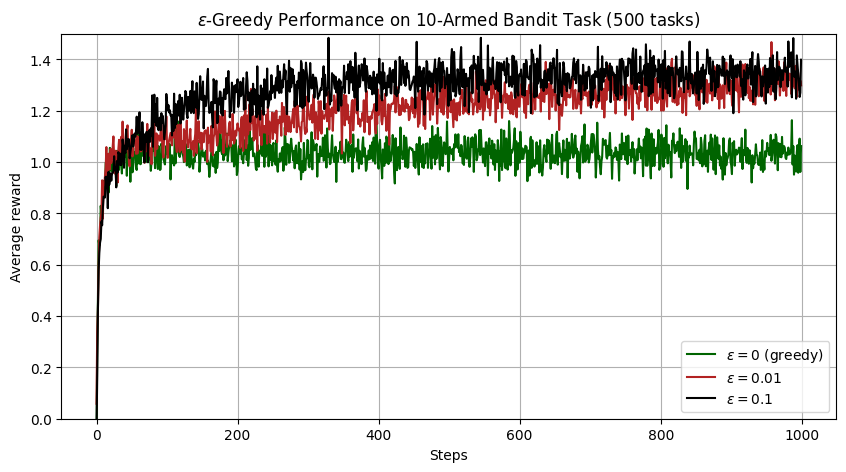

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation settings
n_bandits = 500         # Number of tasks (was 2000 originally)
n_arms = 10             # Number of bandit arms
n_steps = 1000          # Steps per task
epsilons = [0, 0.01, 0.1]
colors = ['darkgreen', 'firebrick', 'black']
labels = [r'$\epsilon = 0$ (greedy)', r'$\epsilon = 0.01$', r'$\epsilon = 0.1$']

# Initialize average rewards for each epsilon
average_rewards = np.zeros((len(epsilons), n_steps))

# Simulation loop
for i, eps in enumerate(epsilons):
    rewards = np.zeros((n_bandits, n_steps))
    for b in range(n_bandits):
        q_true = np.random.normal(loc=0.0, scale=1.0, size=n_arms)  # True action values
        q_est = np.zeros(n_arms)  # Estimated action values
        action_counts = np.zeros(n_arms)

        for t in range(n_steps):
            if np.random.rand() < eps:
                action = np.random.randint(n_arms)  # Exploration
            else:
                max_val = np.max(q_est)
                max_actions = np.flatnonzero(q_est == max_val)
                action = np.random.choice(max_actions)  # Break ties randomly

            reward = np.random.normal(loc=q_true[action], scale=1.0)  # Noisy reward
            action_counts[action] += 1
            q_est[action] += (reward - q_est[action]) / action_counts[action]
            rewards[b, t] = reward

    average_rewards[i] = np.mean(rewards, axis=0)

# Plotting
plt.figure(figsize=(10, 5))
for i in range(len(epsilons)):
    plt.plot(average_rewards[i], label=labels[i], color=colors[i])

plt.title(r'$\epsilon$-Greedy Performance on 10-Armed Bandit Task (500 tasks)')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.5)
plt.show()
